In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load data from csv file

In [13]:
dataset=pd.read_csv('cell_samples.csv')
dataset.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [14]:
dataset.shape

(699, 11)

In [7]:
dataset.size

7689

In [9]:
dataset.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [12]:
dataset['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [17]:
#distribution of the classes

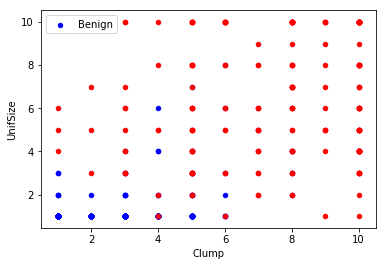

In [32]:
benign_df = dataset[dataset['Class']==2][0:200]
malignant_df = dataset[dataset['Class']==4][0:200]
axes = benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',ax=axes)

In [33]:
#identifying the unwnted rows

In [36]:
dataset.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [40]:
dataset = dataset[pd.to_numeric(dataset['BareNuc'], errors='coerec').notnull()]
dataset['BareNuc'] = dataset['BareNuc'].astype('int')
dataset.dtypes


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [41]:
#remove the unwanted column 

In [47]:
dataset.columns
feature_df = dataset[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
#dataset 100 rows and 11 columns.
#picked 9 columns out of 11 columns

#in ipendent variable
x = np.asarray(feature_df)
#dependent variable
y = np.asarray(dataset['Class'])
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [48]:
#devide the data as Train/Test dataset

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)


In [52]:
x_train.shape

(546, 9)

In [53]:
y_train.shape

(546,)

In [54]:
x_test.shape

(137, 9)

In [55]:
y_test.shape

(137,)

In [56]:
#modeling (SVM with scikit-learn)

In [57]:
from sklearn import svm

In [59]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

   micro avg       0.96      0.96      0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

